In [2]:
from __future__ import print_function, division, unicode_literals
%pylab inline
from ipywidgets import interact, interact_manual

# %cd ..; import uti;

Populating the interactive namespace from numpy and matplotlib


### Экспоненциальный рост

открыл Бернулли, изучая рост дохода по банковским вкладам

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Compound_Interest_with_Varying_Frequencies.svg/500px-Compound_Interest_with_Varying_Frequencies.svg.png)

<b class=tag>Сложные проценты</b>

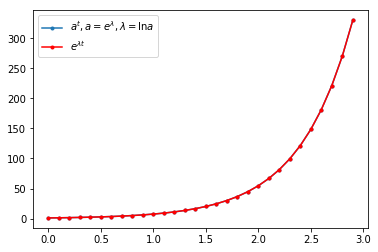

In [3]:
t = arange(0,3,.1)
plot(t, (exp(1)*exp(1))**t, '.-', label=r'$a^t, a=e^\lambda, \lambda = \ln a $');
plot(t, exp(t*2), 'r.-', label=r'$e^{\lambda t}$');
legend();

Модели экспоненциального роста:
* зеленые водоросли в пруду при цветении воды летом
* размножение саранчи при переходе в мигрирующую стадию

### Экспоненциальное угасание

Если функцию экспоненциального роста мы перенесем в знаменатель, то на каждом следующем шаге мы будем получать постепенно уменьшающуюся долю единицы. Более изящая запись - показатель степени с минусом.

$$ \frac{1}{e^t} = e^{-t} $$

In [5]:
exp(-1)

0.36787944117144233

Через 1 временной шаг значение функции угасания составит примерно 0.37 от исходного. Так быстро в природе обычно ничего не убывает. В древности вывели степень красивого угасания под названием "золотое сечение", когда на каждом шаге должно оставаться примерно 0.618 от предыдущего количества. Т.е. скорость угасания примерно в 2 раза медленнее, чем у чистого "экспоненциального спуска".

Давайте посмотрим на эти угасания для нескольких временных шагов.

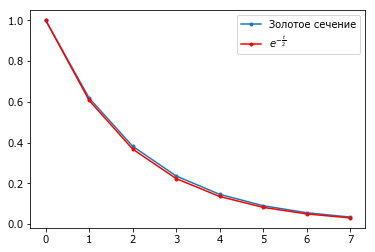

In [4]:
t = arange(8)
z = 0.618033988749894848 #uti.fibonacci()
plot(t, z**t, '.-', label='Золотое сечение')
plot(t, exp(-t/2), 'r.-', label=r'$e^{- \frac{t}{2}}$');
legend();

Процесс убывания по правилу золотого сечения удивительно похож на процесс экспоненциального убывания с половинным показателем степени. А можно ли последовательное золотое сечение привести к функции с основанием $e$?

Пусть $z = 0.618... $ - золотое сечение. Мы хотим подобрать такую функцию с основанием $e$, чтобы скорость изменения была такой же как у функции последовательного золотого сечения $ z^t $. Скорость изменения фукнции - это ее дифферециал. Дифференциал $e^t$ равен t. Продифференцируем...

$$ z^t = e^{ \ln(z^t)} = e^{ \ln(z) \cdot t} $$

$$ (z^t)' = \ln(z) \cdot t$$

$\ln(z)$ - это коэффициент изменения скорости многократного золотого сечения по отношению к стандартной показательной функции с основанием $e$. 

 [Памятка по показательным функциям](https://1cov-edu.ru/mat_analiz/funktsii/pokazatelnaya/)

In [7]:
log(z)

-0.4812118250596032

Немного отличается от 0.5

Скорость угасания удобно задавать через косвенные параметры.

$$\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}$$
 
 http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows

#### Фактор сглаживания $\alpha$
Показывает на какую долю снижается величина за один шаг.
То есть на каждом следующем шаге остается $(1-\alpha)$ от текущего значения.

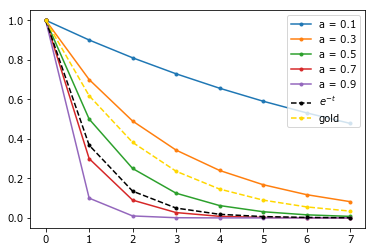

In [14]:
for a in arange(0.1, 1, .2):
    w = (1 - a)**t
    plot(t, w, '.-', label='alpha = {}'.format(a));
    
plot(t, exp(-t), 'k.--', label=r'$e^{- t}$');
plot(t, z**t, '.--', color='gold', label='gold')
legend();

#### Размах угасания $s$
Показывает за сколько шагов величина снизится до незначимой величины. То есть грубо "время жизни".

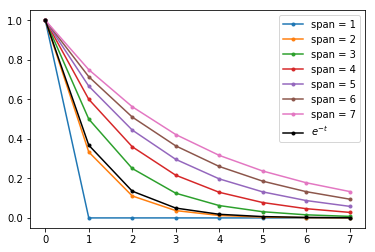

In [57]:
for s in arange(1, 8):
    a = 2/(s+1)
    w = (1 - a)**t
    plot(t, w, '.-', label='span = {}'.format(s));
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
legend();

#### Центр масс $c$
Определяет скорость угасания по позиции центра масс - середина площади под кривой.

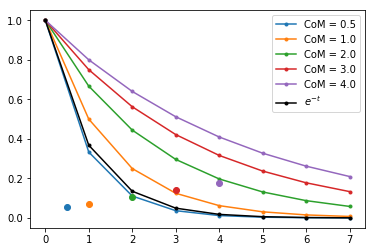

In [53]:
for c in r_[.5, arange(1, 5)]:
    a = 1/(c+1)
    w = (1 - a)**t
    line = plot(t, w, '.-', label='CoM = {}'.format(c));
    plot(c, 1/sum(t*a), 'o', color=line[0].get_color())
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
legend();

#### Период полураспада $h$
Задает скорость угасания как снижение на половину от исходного уровня.

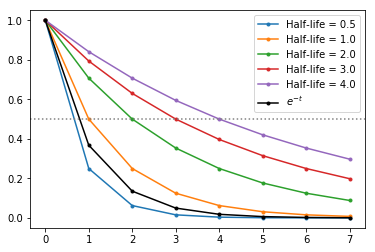

In [30]:
for h in r_[.5, arange(1, 5)]:
    a = 1 - exp(log(.5)/h)
    w = (1 - a)**t
    plot(t, w, '.-', label='Half-life = {}'.format(h));
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
axhline(.5, ls=':', color='gray')
legend();

#### Постоянная времени $\tau$
Xарактеризует время убывания значения до уровня $1/e\approx 0.368$ от своего первоначального значения. То есть показывает во сколько раз процесс медленнее стандартного экспоненциального спада.

<b class=tag>Время релаксации</b>

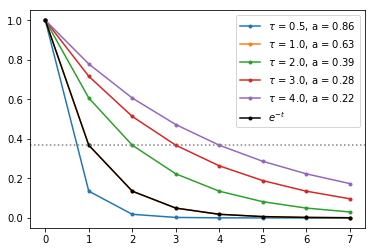

In [77]:
for tau in r_[.5, arange(1, 5)]:
    a = 1 - exp(-1/tau)
    w = (1 - a)**t
#     w = exp(-t/tau)
    plot(t, w, '.-', label=r'$\tau$ = {}, a = {:.2f}'.format(tau, a));
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
axhline(exp(-1), ls=':', color='gray')
legend();

Чтобы не запутаться в "экспоненциальных процессах", надо помнить ключевые моменты.

1. Если число в основании степени меньше единицы, то сколько бы его не умножали на самого себя (возводили в положительную степень), оно будет становиться только меньше, т.е. будет экспоненциальный спад. $0.5 ^{[1,2,3,4]} = [0.500, 0.250, 0.125, 0.063]$ 
2. Если мы возводим число в отрицательную степень, то это равносильно тому, что один поделить на это число в положительной степени. Если число больше единицы (например, 2, 2.718), то будет экспоненциальный спад. $2 ^ {[-1,-2,-3,-4]} = \left[\frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}\right]$
3. Для изменения шкалы (перевода из одних величин в другие) надо поделить число в исходных единицах на количество исходных единиц в новой шкале. Это тривильно для перевода километров в метры, но может быть путанно при конвертации скоростей. Например, постоянная времени $\tau$ меняет скорость процесса через приведение реальной временной шкалы к той, которая была бы при стандартном экспоненциальном спаде. 
Скорость изменения процесса в формулах выражается как производная, а производная отношения двух функций НЕ РАВНА отношению производных от каждой из них (См. [Правила_дифференцирования](https://ru.wikipedia.org/wiki/Производная_функции#Правила_дифференцирования) ).

Для проверки полезно отобразить сравниваемые процессы в виде графиков. Скорость процесса (производная) - это тангенс наклона касательной в данной точке. Т.е. если процесс замедляется со временем, т.е. его скорость постепенно угасает, то касательная постепенно теряет свой угол, постепенно приближаясь к горизонтальной прямой, угол которой равен нулю. Именно так ведут себя касательные в последовательных точках экспоненциального спада.
Чем быстрее происходит экспоненциальный спад, тем быстрее касательной нужно "выправляться" из пикирующего состояния к горизонтальному. Из формулы производной показательной функции следует, что замедление спада пропорционально логарифму основания степени. Логарифм - функция, обратная экспоненте, т.е. логарифм здесь компенсирует экспоненту, чтобы прийти в ноль.

$$(a^t)' = a^t \cdot \ln{a}$$

Если основание степени $a$ в формуле сделать равным числу Эйлера $e$, то второй множитель в выражении справа будет равен 1 по определению, и получится определение экспоненты - функция, производная которой равна самой функции, или скорость изменения процесса равна текущему значению. Из-за этого удобства показательные функции приводят к экспоненциальным с $e$ в основании, изменяя только их показатель путем добавления коэффициента при нем. Таким образом, мы описываем процесс в "экспоненциальных спадах" с непостоянной изменяющейся скоростью. Если мы хотим получить значение скорости в какой-то момент времени в ед/с, то нужно дифференцировать - находить производную:

$$\left(e^{at}\right)' = ae^{at}$$

Изменение за один временной шаг равно произведению одного и того же коэффициента $a$ на текущее значение экспоненциального процесса.

Например, выше мы уже рассмотрели многократное золотое сечение ($a=\ln(z)=-0.4812$) и привели его к экспоненциальной форме. И прикинули, что снижение медленнее стандратного экспоненциального спуска примерно в два раза.

$$ z^t = e^{ \ln(z) \cdot t} = e^{ - \frac{t}{\tau_z}} $$
$$ \ln(z)  = - \frac{1}{\tau_z}$$
$$\tau_z = - \frac{1}{\ln(z)}$$

In [31]:
-1/log(z)

2.0780869212350286

Таким образом, постоянная времени многократного золотого сечения $\tau_z = - \frac{1}{\ln(z)} = 2.078$.

Биологические процессы, в которых на каждом следующем шаге действует только часть агентов $0<p<1$, действовавших на предыдущем шаге, имеют вид экспоненциального спада (exponential decay).

Пример. Демографическая политика Китая многие годы (с 1979 до 2015 г) исповедывала формулу "[одна семья - один ребенок](https://ru.wikipedia.org/wiki/Одна_семья_—_один_ребёнок)".  Упрощенно модель изменения численности населения за одно поколение выражается формулой
$N_i = 0.5 N_{i-1} $, где $i$ - номер поколения. 

По аналогии с рассмотренным выше, это экспоненциальный процесс $N_0 e^{\ln(0.5) \cdot g}$, где $g$ - время одного поколения.

In [39]:
log(0.5)

-0.6931471805599453

Чтобы перевести временной шаг в годы, примем время одного поколения за 30 лет.


In [40]:
log(0.5) * 30

-20.79441541679836

In [42]:
exp(-20)

2.061153622438558e-09

Коэффициент $a$ может быть больше нуля. 

### Логарифмирование

#### Энтропия

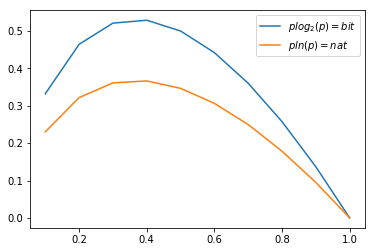

In [8]:
pp = arange(0,1,.1) + .1
qq = 1 - pp

plot(pp, -pp*log2(pp), label='$p log_2(p) = bit$')
plot(pp, -pp*log(pp), label='$p ln(p) = nat$')
#plot(pp, log(pp), label='log')
#plot(pp, -cumprod(.9*(1-pp)), label='log')
legend();

### Сложные процессы

Переходные процессы - переход из одного состояния в другое.

Такие процессы типичны для физики и химии. Биология изучает многие физические и химические процессы в рамках отраслей биофизики и биохимии. Почти все они описываются дифференциальными уравнениями, т.е. которые задают не всю форму кривой процесса, а только разницу между текущим и предыдущим состоянием.
Собственно биологических процессов, связанных с размножением, динамикой популяций, поведением, которые хорошо описывались бы экспоненциальными моделями очень немного. Такие процессы похожи на физические процессы рассеивания света - на каждом следующем шаге остается только часть исходного количества.

Экспоненциальный спад численности наблюдается в случае естественного вымирания, когда есть полное разрушение среды обитания, но жизни самих организмов ничего не угрожает.  При этом нет ни внезапной гибели всей популяции как при пересыхании отдельной лужи, ни частичного разрушения среды обитания, когда можно перебежать или переползти в соседнюю лужу/соседний лес. Полное разрушение происходит при гибели хозяина, тело которого является средой обитания паразита, причем изолированной от аналогичных сред. Так, угасание микробных сообществ в кишечнике человека после смерти идёт по экспоненте и остаточное количество конкретных видов бацилл может использоваться для вычисления времени смерти.
Hauther K. A. et al. Estimating time since death from postmortem human gut microbial communities //Journal of forensic sciences. – 2015. – Т. 60. – №. 5. – С. 1234-1240. https://onlinelibrary.wiley.com/doi/abs/10.1111/1556-4029.12828



Если это другое состояние нестабильно, то система возвращается в исходное состояние. Траектория возвращения может быть другой. Живые системы нестабильны, но стремятся к гомеостазу - квазистабильному состоянию. Например, божья коровка на стебельке - упадет вниз - снова вскарабкается. Распрямление примятой травы - сгибается от верхушки, распрямляется от корня.

Функция экспоненты годится для порождения более сложных функций. Но для этого мы должны усложнить показатель степени - сделать его комплексным (лат. complexus - полученный в результате комплектации). Формально - комплексное число такое же как и остальные - с ним можно производить разные операции, например, возводить в степень. Технически, с точки зрения компьютера, - это два числа - обычное число (вещественная часть) и коэффициент перед мнимой единицей (мнимая часть), которые зависимы друг от друга и для наглядности изображаются как вектор - одно задает длину вектора, а другое - направление. Мнимая единица - особый объект, который одновременно и 1 и -1, в коде обозначается 1j.

In [36]:
exp(-(1+0j)), exp(-(0+1j))

((0.36787944117144233-0j), (0.5403023058681398-0.8414709848078965j))

C:\a\WinPython\python-3.5.2.amd64\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


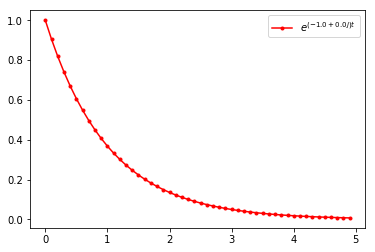

In [9]:
t = arange(0,5,.1).astype(np.complex)

print('1. Изучите поведение функции при изменении a в окрестности нуля.')
print('2. Установите а=0 и изучите поведение функции при изменении b. Симметрично относительно 0?')
print('3. Подберите параметры для получения затухающих колебаний, одиночных горбов и впадин.')

@interact(a=(-5.,5.), b=(-5.,5.))
def _plot(a=-1.,b=0.):
    plot(t, exp((a+b*1j)*t), 'r.-', label=r'$e^{{({}+{}j) t}}$'.format(a,b));
    legend();

Поскольку все многообразие траекторий задается всего одним комплексным числом, то разработаны способы подбора параметров для получения сжатого математического описания разных процессов.

Примеры описания процессов:
  - $a = -5, b = -5$ - координата кончика вибриссы относительно уровня кожи при прикасании к колену: сначала вдавливается в кожу, потом остается на поверхности.
  - $a = -1.8, b = -4.2$ - изменение координаты центра тела при прыжке в высоту: сначала приседание, затем прыжок и приземление.
  - $a = 0.3, b = 1.6$ - горизонтальные изменения положения тела змеи

В реальности комплексных чисел нет и все сложные биологические процессы состоят из нескольких фаз - фаз подъема и спада.

Однако, знакомство с тем, как введение комплексных чисел может порождать колебания разных частот, полезно для интуитивного понимания математических приемов разложения сигналов на составляющие.

## Циклические колебания

Чередование периодов подъема и спуска.

Метафора: демисезонный, следовательно два сезона: зима-лето

В северном полушарии:
- лето - активный плодотворный период в природе
- зима - период покоя

остальные переходы, однако именно в переходные периоды - активная учеба - осенний и весенний семестры. Учеба = изменение от незнания к знанию.

пока климат стабильный - и летом и зимой - ничего нового не изобретается.

Активный период - единица счета циклов для измерения интервалов
- активность летом - 5 лет
- активность днем - 5 дней

### Упрощение и усложнение 

Некоторые биологические процессы удалось объяснить как сочетание нескольких процессов, изменяющихся по экспоненте.

Потенциал действия, пятна на шкуре леопарда.


Колебания в модели хищник-жертва - фантом. Любое незначительное влияние остановит этот маятник: эпидемия, нарушение ареала обитания, например. строительство дороги, через которую зайцы будут перебегать, а рыси побоятся.
Т.е. колебания есть в следствии статистического сигнала, но их нет в источнике сигнала.

Часто биологические процессы настолько сложные, что их нельзя редуцировать к сумме физическо-химических процессов вроде затуханий и колебаний.

Поведение примитивных сообществ животных оказывается способным решать многие задачи, с которыми плохо справляются даже суперкомпьютеры, если решать проблемы в лоб - перебором.
Тогда живые процессы становятся источником вдохновения для технарей - специалистов в областе информационных технологий.


Пример. Эволюционные вычисления с использованием продвинутого алгоритма кормежки бактерий  используется для получения медицинских изображений. Оптимизация получения 3-хмерных медицинских изображний - томограмм - настолько сложна, что используются математические модели, "подсмотренные" у эволюционного отбора и коллективного поведения простейших.

Bermejo E. et al. A comparative study on the application of advanced bacterial foraging models to image registration //Information Sciences. – 2015. – Т. 295. – С. 160-181.
https://www.sciencedirect.com/science/article/pii/S0020025514010007

> Если биолог оценивает жизнь как чудо, то это настоящий биолог. Если биолог изучает устройство биологических объектов как механических систем, то это физик или химик.

> (с) Дмитрий Щербина 2018